# Segmenting and Clustering Neighborhoods in Medellín

## Introduction
In this case, I present an exploration, segmentation, and clusterization of the neighborhoods in the city of Medellín.
For the Medellín neighborhood data, I will use the respective geojson file obtained from the municipality government which has all the information I need to explore and cluster the neighborhoods in Medellín. 

First, I will perform web-scraping to acquire the data. Later, data wrangling, data cleaning and data reading will be performed to create a structured dataframe to do some analaysis of the data.

Finally, I will explore the dataset and cluster the neighborhoods in the city of Medellín.

In [1]:
#Importing libraries

import numpy as np # library to handle data in a vectorized manner
import os
import geopandas
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import geopandas as gp

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium import plugins

from tqdm import tqdm

print('Libraries imported.')

Libraries imported.


# CHAPTER A. ANALYZING VENUES IN MEDELLÍN

### Loading data and creating dataframes

In [2]:
# Medellín information Json

med_latitude = 6.245768
med_longitude = -75.577228

MED_raw = gp.GeoDataFrame.from_file('data/Barrio_Vereda.geojson')
print(MED_raw.shape)
MED_raw.head()

(332, 7)


OBJECTID CODIGO                    NOMBRE  SUBTIPO_BARRIOVEREDA  \
0       661   1422             La Aguacatala                     1   
1       662   0810                  El Pinal                     1   
2       663   0719              Fuente Clara                     1   
3       664   0102  Santo Domingo Savio No.2                     1   
4       665   0302               Las Granjas                     1   

       SHAPEAREA     SHAPELEN  \
0  622090.156105  3302.658052   
1  413416.804617  3271.574553   
2  236441.173403  3022.337658   
3  264750.452451  2943.707654   
4  641349.275023  3964.702306   

                                            geometry  
0  POLYGON ((-75.5762310714583 6.194621906760724,...  
1  POLYGON ((-75.54160968023029 6.245319337420042...  
2  POLYGON ((-75.60106983601668 6.278324025366627...  
3  POLYGON ((-75.54062098774783 6.302374662814517...  
4  POLYGON ((-75.54371627443042 6.28265929949213,...

In [3]:
MED_raw.dtypes


OBJECTID                  int64
CODIGO                   object
NOMBRE                   object
SUBTIPO_BARRIOVEREDA      int64
SHAPEAREA               float64
SHAPELEN                float64
geometry                 object
dtype: object

## 3. Getting coordinates of each Neighborhood

Let's get the geographical coordinates of Medellín.

In [35]:
address = 'Prado Centro, Medellín'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Prado Centro, Medellín are 6.2599757, -75.5623003.


In [126]:
# Adding a column with respective coordinates of each Neighborhood
lats = []
lons = []

for i in tqdm(MED_raw['NOMBRE'] + ', Medellín'):
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(i)
    lats.append(location.latitude)
    lons.append(location.longitude)



100%|██████████| 332/332 [04:54<00:00,  1.14it/s]

In [127]:
MED_raw['latitude'] = lats
MED_raw['longitude'] = lons

In [6]:
MED_raw.head()

Unnamed: 0  OBJECTID CODIGO                    NOMBRE  \
0           0       661   1422             La Aguacatala   
1           1       662   0810                  El Pinal   
2           2       663   0719              Fuente Clara   
3           3       664   0102  Santo Domingo Savio No.2   
4           4       665   0302               Las Granjas   

   SUBTIPO_BARRIOVEREDA      SHAPEAREA     SHAPELEN  \
0                     1  622090.156105  3302.658052   
1                     1  413416.804617  3271.574553   
2                     1  236441.173403  3022.337658   
3                     1  264750.452451  2943.707654   
4                     1  641349.275023  3964.702306   

                                            geometry  latitude  longitude  
0  POLYGON ((-75.5762310714583 6.194621906760724,...  6.198763 -75.577201  
1  POLYGON ((-75.54160968023029 6.245319337420042...  6.244487 -75.545597  
2  POLYGON ((-75.60106983601668 6.278324025366627...  6.277633 -75.605593  
3  POLYGON ((-75.54062098774783 6.302374662814517...  6.299473 -75.540104  
4  POLYGON ((-75.54371627443042 6.28265929949213,...  6.279339 -75.549459

In [187]:
# Saving the new Dataframe
MED_raw.to_csv('data/MED_raw.csv')

In [4]:
# Loading the new df
MED_raw = pd.read_csv('data/MED_raw.csv')

MED_raw.head()

Unnamed: 0  OBJECTID CODIGO                    NOMBRE  \
0           0       661   1422             La Aguacatala   
1           1       662   0810                  El Pinal   
2           2       663   0719              Fuente Clara   
3           3       664   0102  Santo Domingo Savio No.2   
4           4       665   0302               Las Granjas   

   SUBTIPO_BARRIOVEREDA      SHAPEAREA     SHAPELEN  \
0                     1  622090.156105  3302.658052   
1                     1  413416.804617  3271.574553   
2                     1  236441.173403  3022.337658   
3                     1  264750.452451  2943.707654   
4                     1  641349.275023  3964.702306   

                                            geometry  latitude  longitude  
0  POLYGON ((-75.5762310714583 6.194621906760724,...  6.198763 -75.577201  
1  POLYGON ((-75.54160968023029 6.245319337420042...  6.244487 -75.545597  
2  POLYGON ((-75.60106983601668 6.278324025366627...  6.277633 -75.605593  
3  POLYGON ((-75.54062098774783 6.302374662814517...  6.299473 -75.540104  
4  POLYGON ((-75.54371627443042 6.28265929949213,...  6.279339 -75.549459

Let's visualizate the neighborhoods in Medellín.

In [5]:
# create map of Medellín using latitude and longitude values
map_medellin = folium.Map(location=[med_latitude, med_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(MED_raw['latitude'], MED_raw['longitude'], MED_raw['NOMBRE']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_medellin)  
    
map_medellin

## 4. Credentials of Foursquare

I am going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [7]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
radius = 500


print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: APR2P4WFTBAPW14KF0LVUCJ55JE1UEMUX0JYBTXQECRJKML2
CLIENT_SECRET:0JXFECPU4YYZZY4VWO0C0EJGADM30AVJQUAWJB0ZAM545HKM


## 5. Explore Neighborhoods in Medellín

#### Let's create a function to analyze all the neighborhoods in Medellín

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *medellin_venues*.

In [9]:
medellin_venues = getNearbyVenues(names=MED_raw['NOMBRE'],
                                   latitudes=MED_raw['latitude'],
                                   longitudes=MED_raw['longitude']
                                  )



In [10]:
#### Let's check the size of the resulting dataframe

print(medellin_venues.shape)
medellin_venues.head()

(2853, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  La Aguacatala               6.198763              -75.577201   
1  La Aguacatala               6.198763              -75.577201   
2  La Aguacatala               6.198763              -75.577201   
3  La Aguacatala               6.198763              -75.577201   
4  La Aguacatala               6.198763              -75.577201   

                     Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Centro Comercial Oviedo        6.199261       -75.575409   Shopping Mall  
1              Mundo Verde        6.199238       -75.575098     Salad Place  
2               Santa Leña        6.199747       -75.575578          Bakery  
3                   Mimo's        6.199026       -75.575457  Ice Cream Shop  
4          Medellín Secret        6.198751       -75.575057  Breakfast Spot

Let's check how many venues were returned for each neighborhood

In [18]:
# Lets change name of 'Cafeteria' and 'Café' to 'Coffee Shop'
medellin_venues = medellin_venues.replace('Cafeteria', 'Coffee Shop')
medellin_venues = medellin_venues.replace('Café', 'Coffee Shop')

medellin_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                 
Aldea Pablo VI                                   2                       2   
Alejandro Echavarría                             4                       4   
Alejandría                                      22                      22   
Alfonso López                                    1                       1   
Altamira                                         5                       5   
Altavista Sector Central                         2                       2   
Altos del Poblado                                4                       4   
Andalucía                                        5                       5   
Antonio Nariño                                   2                       2   
Aranjuez                                         2                       2   
Asomadera No.1                                   5                       5   
Asomadera No.2                                  29                      29   
Asomadera No.3                                   6                       6   
Astorga                                         97                      97   
Aures No.2                                       2                       2   
Avenida 80 Calle 65                              6                       6   
B. Cerro El Volador                              3                       3   
Barrio Caicedo                                   5                       5   
Barrio Colombia                                 76                      76   
Barrio Colón                                    19                      19   
Barrio Cristóbal                                 6                       6   
Barrios de Jesús                                 1                       1   
Batallón Cuarta Brigada                         12                      12   
Batallón Girardot                                1                       1   
Belen La Mota                                   15                      15   
Belencito                                        4                       4   
Bello Horizonte                                  1                       1   
Belén                                            5                       5   
Belén La Gloria                                  5                       5   
Belén Rincón                                     3                       3   
Berlín                                           4                       4   
Bermejal-Los Álamos                              4                       4   
Betania                                          3                       3   
Bolivariana                                     31                      31   
Bomboná No.1                                    18                      18   
Bosques de San Pablo                             4                       4   
Boston                                          21                      21   
Boyacá                                           3                       3   
Brasilia                                         3                       3   
Calasanz                                        19                      19   
Calasanz Parte Alta                              2                       2   
Calle 109 # 52-20                                4                       4   
Calle Nueva                                     19                      19   
Campo Alegre                                     4                       4   
Campo Amor                                      10                      10   
Campo Valdés No.1                                4                       4   
Campo Valdés No.2                                3                       3   
Cancha la Maracaná                               8                       8   
Caribe                                          18                      18   
Carlos Castro Saavedra                           3 

#### Let's find out how many unique categories can be curated from all the returned venues

In [19]:
print('There are {} uniques categories.'.format(len(medellin_venues['Venue Category'].unique())))

There are 237 uniques categories.


<a id='item3'></a>

## 6. Analyzing Each Neighborhood

In [20]:
# one hot encoding
medellin_onehot = pd.get_dummies(medellin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
medellin_onehot['Neighborhood'] = medellin_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [medellin_onehot.columns[-1]] + list(medellin_onehot.columns[:-1])
toronto_onehot = medellin_onehot[fixed_columns]

medellin_onehot.head()

Advertising Agency  African Restaurant  Airport  Airport Lounge  \
0                   0                   0        0               0   
1                   0                   0        0               0   
2                   0                   0        0               0   
3                   0                   0        0               0   
4                   0                   0        0               0   

   Airport Terminal  American Restaurant  Amphitheater  Antique Shop  \
0                 0                    0             0             0   
1                 0                    0             0             0   
2                 0                    0             0             0   
3                 0                    0             0             0   
4                 0                    0             0             0   

   Aquarium  Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
0         0                 0                       0            0   
1         0                 0                       0            0   
2         0                 0                       0            0   
3         0                 0                       0            0   
4         0                 0                       0            0   

   Art Museum  Asian Restaurant  Athletics & Sports  Auditorium  \
0           0                 0                   0           0   
1           0                 0                   0           0   
2           0                 0                   0           0   
3           0                 0                   0           0   
4           0                 0                   0           0   

   Auto Dealership  Auto Garage  Auto Workshop  BBQ Joint  Bakery  Bar  \
0                0            0              0          0       0    0   
1                0            0              0          0       0    0   
2                0            0              0          0       1    0   
3                0            0              0          0       0    0   
4                0            0              0          0       0    0   

   Baseball Field  Basketball Court  Bed & Breakfast  Beer Bar  Beer Garden  \
0               0                 0                0         0            0   
1               0                 0                0         0            0   
2               0                 0                0         0            0   
3               0                 0                0         0            0   
4               0                 0                0         0            0   

   Beer Store  Betting Shop  Big Box Store  Bike Rental / Bike Share  \
0           0             0              0                         0   
1           0             0              0                         0   
2           0             0              0                         0   
3           0             0              0                         0   
4           0             0              0                         0   

   Bike Shop  Bike Trail  Bistro  Boarding House  Bookstore  Botanical Garden  \
0          0           0       0               0          0                 0   
1          0           0       0               0          0                 0   
2          0           0       0               0          0                 0   
3          0           0       0               0          0                 0   
4          0           0       0               0          0                 0   

   Boutique  Bowling Alley  Brazilian Restaurant  Breakfast Spot  Brewery  \
0         0              0                     0               0        0   
1         0              0                     0               0        0   
2         0              0                     0               0        0   
3         0              0                     0               0        0   
4         0              0                     0               1        0   

   Burger Joint  Burri

And let's examine the new dataframe size.

In [21]:
medellin_onehot.shape

(2853, 238)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [22]:
medellin_grouped = medellin_onehot.groupby('Neighborhood').mean().reset_index()
medellin_grouped

Neighborhood  Advertising Agency  African Restaurant  \
0                 Aldea Pablo VI                0.00            0.000000   
1           Alejandro Echavarría                0.00            0.000000   
2                     Alejandría                0.00            0.000000   
3                  Alfonso López                0.00            0.000000   
4                       Altamira                0.00            0.000000   
5       Altavista Sector Central                0.00            0.000000   
6              Altos del Poblado                0.00            0.000000   
7                      Andalucía                0.00            0.000000   
8                 Antonio Nariño                0.00            0.000000   
9                       Aranjuez                0.00            0.000000   
10                Asomadera No.1                0.00            0.000000   
11                Asomadera No.2                0.00            0.000000   
12                Asomadera No.3                0.00            0.000000   
13                       Astorga                0.00            0.000000   
14                    Aures No.2                0.00            0.000000   
15           Avenida 80 Calle 65                0.00            0.000000   
16           B. Cerro El Volador                0.00            0.000000   
17                Barrio Caicedo                0.00            0.000000   
18               Barrio Colombia                0.00            0.000000   
19                  Barrio Colón                0.00            0.000000   
20              Barrio Cristóbal                0.00            0.000000   
21              Barrios de Jesús                0.00            0.000000   
22       Batallón Cuarta Brigada                0.00            0.000000   
23             Batallón Girardot                0.00            0.000000   
24                 Belen La Mota                0.00            0.000000   
25                     Belencito                0.00            0.000000   
26               Bello Horizonte                0.00            0.000000   
27                         Belén                0.00            0.000000   
28               Belén La Gloria                0.00            0.000000   
29                  Belén Rincón                0.00            0.000000   
30                        Berlín                0.00            0.000000   
31           Bermejal-Los Álamos                0.00            0.000000   
32                       Betania                0.00            0.000000   
33                   Bolivariana                0.00            0.000000   
34                  Bomboná No.1                0.00            0.000000   
35          Bosques de San Pablo                0.00            0.000000   
36                        Boston                0.00            0.000000   
37                        Boyacá                0.00            0.000000   
38                      Brasilia                0.00            0.000000   
39                      Calasanz                0.00            0.000000   
40           Calasanz Parte Alta                0.00            0.000000   
41             Calle 109 # 52-20                0.00            0.000000   
42                   Calle Nueva                0.00            0.000000   
43                  Campo Alegre                0.00            0.000000   
44                    Campo Amor                0.00            0.000000   
45             Campo Valdés No.1                0.00            0.000000   
46             Campo Valdés No.2                0.00            0.000000   
47            Cancha la Maracaná                0.00            0.000000   
48                        Caribe                0.00            0.000000   
49        Carlos Castro Saavedra                0.00            0.000000   
50            Carlos E. Restrepo                0.00            0.000000   
51                     Carpinelo                0.00            0.00

#### Let's confirm the new size

In [23]:
medellin_grouped.shape

(257, 238)

#### Let's print each neighborhood along with the top 5 most common venues

In [24]:
num_top_venues = 3

for hood in medellin_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = medellin_grouped[medellin_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aldea Pablo VI----
                        venue  freq
0  Construction & Landscaping   0.5
1                  Restaurant   0.5
2                 Pastry Shop   0.0


----Alejandro Echavarría----
                  venue  freq
0         Shopping Mall  0.25
1        Ice Cream Shop  0.25
2  Gym / Fitness Center  0.25


----Alejandría----
                venue  freq
0               Hotel  0.18
1  Italian Restaurant  0.09
2       Shopping Mall  0.09


----Alfonso López----
                venue  freq
0        Burger Joint   1.0
1  Advertising Agency   0.0
2          Public Art   0.0


----Altamira----
            venue  freq
0     Coffee Shop   0.4
1  Breakfast Spot   0.2
2       BBQ Joint   0.2


----Altavista Sector Central----
                        venue  freq
0  Construction & Landscaping   0.5
1                Home Service   0.5
2                 Pastry Shop   0.0


----Altos del Poblado----
         venue  freq
0        Hotel  0.25
1  Snack Place  0.25
2   Restaurant  0.25


----A

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = medellin_grouped['Neighborhood']

for ind in np.arange(medellin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(medellin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood       1st Most Common Venue 2nd Most Common Venue  \
0        Aldea Pablo VI  Construction & Landscaping            Restaurant   
1  Alejandro Echavarría               Shopping Mall          Tram Station   
2            Alejandría                       Hotel         Shopping Mall   
3         Alfonso López                Burger Joint                   Zoo   
4              Altamira                 Coffee Shop        Breakfast Spot   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0      Doner Restaurant     Food & Drink Shop                  Food   
1        Ice Cream Shop  Gym / Fitness Center     Electronics Store   
2            Restaurant           Coffee Shop    Italian Restaurant   
3            Donut Shop     Food & Drink Shop                  Food   
4           Art Gallery             BBQ Joint                   Zoo   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0     Fish & Chips Shop  Fast Food Restaurant        Farmers Market   
1         Event Service            Eye Doctor               Factory   
2                   Gym      Sushi Restaurant             BBQ Joint   
3     Fish & Chips Shop  Fast Food Restaurant        Farmers Market   
4     Electronics Store     Food & Drink Shop                  Food   

      9th Most Common Venue 10th Most Common Venue  
0                      Farm     Falafel Restaurant  
1        Falafel Restaurant                    Zoo  
2  Mediterranean Restaurant     Frozen Yogurt Shop  
3                      Farm     Falafel Restaurant  
4         Fish & Chips Shop   Fast Food Restaurant

<a id='item4'></a>

## 7. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

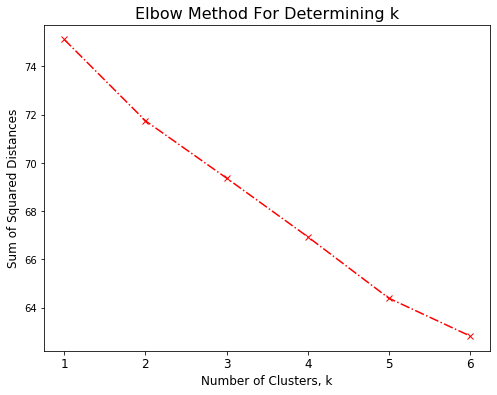

In [88]:
# Defining number of K applying the Elbow method

sum_sq_d = []
K = range(1,7)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(medellin_grouped_clustering)
    sum_sq_d.append(km.inertia_)
plt.figure(figsize=(8,6))
plt.plot(K, sum_sq_d, 'rx-.')
plt.xlabel('Number of Clusters, k', fontsize=12)
plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.title('Elbow Method For Determining k', fontsize=16)
plt.xticks(range(1,7), fontsize=12)
plt.show()

From the Elbow method, we can conclude that 5 is a good number of K for clustering our data.

In [27]:
# set number of clusters
kclusters = 5

medellin_grouped_clustering = medellin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(medellin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 4, 0, 1, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [28]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

medellin_merged = MED_raw

# merge medellin_grouped with medellin_data to add latitude/longitude for each neighborhood
medellin_merged = medellin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='NOMBRE')

medellin_merged.head() # check the last columns!

Unnamed: 0  OBJECTID CODIGO                    NOMBRE  \
0           0       661   1422             La Aguacatala   
1           1       662   0810                  El Pinal   
2           2       663   0719              Fuente Clara   
3           3       664   0102  Santo Domingo Savio No.2   
4           4       665   0302               Las Granjas   

   SUBTIPO_BARRIOVEREDA      SHAPEAREA     SHAPELEN  \
0                     1  622090.156105  3302.658052   
1                     1  413416.804617  3271.574553   
2                     1  236441.173403  3022.337658   
3                     1  264750.452451  2943.707654   
4                     1  641349.275023  3964.702306   

                                            geometry  latitude  longitude  \
0  POLYGON ((-75.5762310714583 6.194621906760724,...  6.198763 -75.577201   
1  POLYGON ((-75.54160968023029 6.245319337420042...  6.244487 -75.545597   
2  POLYGON ((-75.60106983601668 6.278324025366627...  6.277633 -75.605593   
3  POLYGON ((-75.54062098774783 6.302374662814517...  6.299473 -75.540104   
4  POLYGON ((-75.54371627443042 6.28265929949213,...  6.279339 -75.549459   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0             0.0           Coffee Shop                 Hotel   
1             4.0          Home Service                   Zoo   
2             NaN                   NaN                   NaN   
3             NaN                   NaN                   NaN   
4             0.0           Bus Station          Betting Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0    Italian Restaurant        Ice Cream Shop           Salad Place   
1      Doner Restaurant     Food & Drink Shop                  Food   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4          Soccer Field          Antique Shop                   Zoo   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0          Cocktail Bar         Shopping Mall        Sandwich Place   
1     Fish & Chips Shop  Fast Food Restaurant        Farmers Market   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4     Food & Drink Shop                  Food     Fish & Chips Shop   

  9th Most Common Venue 10th Most Common Venue  
0                   Gym              Bookstore  
1                  Farm     Falafel Restaurant  
2                   NaN                    NaN  
3                   NaN                    NaN  
4  Fast Food Restaurant         Farmers Market

In [29]:
medellin_merged.head()

Unnamed: 0  OBJECTID CODIGO                    NOMBRE  \
0           0       661   1422             La Aguacatala   
1           1       662   0810                  El Pinal   
2           2       663   0719              Fuente Clara   
3           3       664   0102  Santo Domingo Savio No.2   
4           4       665   0302               Las Granjas   

   SUBTIPO_BARRIOVEREDA      SHAPEAREA     SHAPELEN  \
0                     1  622090.156105  3302.658052   
1                     1  413416.804617  3271.574553   
2                     1  236441.173403  3022.337658   
3                     1  264750.452451  2943.707654   
4                     1  641349.275023  3964.702306   

                                            geometry  latitude  longitude  \
0  POLYGON ((-75.5762310714583 6.194621906760724,...  6.198763 -75.577201   
1  POLYGON ((-75.54160968023029 6.245319337420042...  6.244487 -75.545597   
2  POLYGON ((-75.60106983601668 6.278324025366627...  6.277633 -75.605593   
3  POLYGON ((-75.54062098774783 6.302374662814517...  6.299473 -75.540104   
4  POLYGON ((-75.54371627443042 6.28265929949213,...  6.279339 -75.549459   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0             0.0           Coffee Shop                 Hotel   
1             4.0          Home Service                   Zoo   
2             NaN                   NaN                   NaN   
3             NaN                   NaN                   NaN   
4             0.0           Bus Station          Betting Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0    Italian Restaurant        Ice Cream Shop           Salad Place   
1      Doner Restaurant     Food & Drink Shop                  Food   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4          Soccer Field          Antique Shop                   Zoo   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0          Cocktail Bar         Shopping Mall        Sandwich Place   
1     Fish & Chips Shop  Fast Food Restaurant        Farmers Market   
2                   NaN                   NaN                   NaN   
3                   NaN                   NaN                   NaN   
4     Food & Drink Shop                  Food     Fish & Chips Shop   

  9th Most Common Venue 10th Most Common Venue  
0                   Gym              Bookstore  
1                  Farm     Falafel Restaurant  
2                   NaN                    NaN  
3                   NaN                    NaN  
4  Fast Food Restaurant         Farmers Market

In [30]:
medellin_merged.isna().sum()

Unnamed: 0                 0
OBJECTID                   0
CODIGO                     0
NOMBRE                     0
SUBTIPO_BARRIOVEREDA       0
SHAPEAREA                  0
SHAPELEN                   0
geometry                   0
latitude                   0
longitude                  0
Cluster Labels            68
1st Most Common Venue     68
2nd Most Common Venue     68
3rd Most Common Venue     68
4th Most Common Venue     68
5th Most Common Venue     68
6th Most Common Venue     68
7th Most Common Venue     68
8th Most Common Venue     68
9th Most Common Venue     68
10th Most Common Venue    68
dtype: int64

In [31]:
# Lets drop NAN rows, because there are some parts in the city in which peoplae have not rated any venue
medellin_merged.dropna(inplace=True)
medellin_merged.head()



Unnamed: 0  OBJECTID   CODIGO            NOMBRE  SUBTIPO_BARRIOVEREDA  \
0           0       661     1422     La Aguacatala                     1   
1           1       662     0810          El Pinal                     1   
4           4       665     0302       Las Granjas                     1   
5           5       666     0902  Barrios de Jesús                     1   
6           6       667  Inst_16      La Alpujarra                     1   

       SHAPEAREA     SHAPELEN  \
0  622090.156105  3302.658052   
1  413416.804617  3271.574553   
4  641349.275023  3964.702306   
5  442235.667276  3754.624150   
6  316458.787376  2524.193193   

                                            geometry  latitude  longitude  \
0  POLYGON ((-75.5762310714583 6.194621906760724,...  6.198763 -75.577201   
1  POLYGON ((-75.54160968023029 6.245319337420042...  6.244487 -75.545597   
4  POLYGON ((-75.54371627443042 6.28265929949213,...  6.279339 -75.549459   
5  POLYGON ((-75.53886007848558 6.232319229324902...  6.229939 -75.537100   
6  POLYGON ((-75.57524261070419 6.246265807384879...  6.243092 -75.571287   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0             0.0           Coffee Shop                 Hotel   
1             4.0          Home Service                   Zoo   
4             0.0           Bus Station          Betting Shop   
5             0.0        Hardware Store                   Zoo   
6             0.0         Metro Station        Clothing Store   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0    Italian Restaurant        Ice Cream Shop           Salad Place   
1      Doner Restaurant     Food & Drink Shop                  Food   
4          Soccer Field          Antique Shop                   Zoo   
5      Doner Restaurant     Food & Drink Shop                  Food   
6         Historic Site      Pedestrian Plaza   Fried Chicken Joint   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0          Cocktail Bar         Shopping Mall        Sandwich Place   
1     Fish & Chips Shop  Fast Food Restaurant        Farmers Market   
4     Food & Drink Shop                  Food     Fish & Chips Shop   
5     Fish & Chips Shop  Fast Food Restaurant        Farmers Market   
6  Fast Food Restaurant       Bed & Breakfast         Tour Provider   

  9th Most Common Venue 10th Most Common Venue  
0                   Gym              Bookstore  
1                  Farm     Falafel Restaurant  
4  Fast Food Restaurant         Farmers Market  
5                  Farm     Falafel Restaurant  
6                  Park         Sandwich Place

In [32]:
medellin_merged['Cluster Labels'] = medellin_merged['Cluster Labels'].astype(int)

Finally, let's visualize the resulting clusters

In [33]:
# create map
map_clusters = folium.Map(location=[med_latitude, med_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(medellin_merged['latitude'], medellin_merged['longitude'], medellin_merged['NOMBRE'], medellin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

## 8. Examine Clusters

Now, we examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

#### Cluster 0

In [34]:
medellin_merged.loc[medellin_merged['Cluster Labels'] == 0, medellin_merged.columns[[3] + list(range(11, medellin_merged.shape[1]))]]

NOMBRE       1st Most Common Venue  \
0                  La Aguacatala                 Coffee Shop   
4                    Las Granjas                 Bus Station   
5               Barrios de Jesús              Hardware Store   
6                   La Alpujarra               Metro Station   
7               Corazón de Jesús                Concert Hall   
9                        Toscana  Construction & Landscaping   
10                     Los Pinos                 Supermarket   
12                  La Hondonada                      Bakery   
15                     Picachito              Scenic Lookout   
16                Santa Teresita        Fast Food Restaurant   
17         Francisco Antonio Zea                Burger Joint   
18                 Belen La Mota               Shopping Mall   
20                    La América                         Gym   
21                       Miranda   Latin American Restaurant   
22        U.D. Atanasio Girardot               Shopping Mall   
24              El Diamante No.2                 Supermarket   
25        Nueva Villa del Aburrá              Clothing Store   
27            Trece de Noviembre  Construction & Landscaping   
28          Doce de Octubre No.1                Burger Joint   
29         La Loma de Los Bernal                   Pet Store   
30                 Juan Pablo II      Furniture / Home Store   
31                   Villa Flora                       Hotel   
32                        Tenche              Clothing Store   
34             La Esperanza No.2                       Plaza   
35                      Pedregal                     Theater   
36                  Prado Centro               Metro Station   
37                      Aranjuez                  Art Museum   
38         Manrique Central No.2                 Bus Station   
41                    Sin Nombre  Construction & Landscaping   
42                      Calasanz               Grocery Store   
43           Bermejal-Los Álamos                       Plaza   
44                Jesús Nazareno               Metro Station   
45                 Ocho de Marzo      Furniture / Home Store   
46                        Fátima                         Gym   
47             Terminal de Norte                 Bus Station   
49                Aldea Pablo VI  Construction & Landscaping   
50                 Villa Hermosa     Comfort Food Restaurant   
51                Las Lomas No.1                       Hotel   
54                       Kennedy  Construction & Landscaping   
55                      Santa Fé                   BBQ Joint   
56          Terminal de guayabal              Cosmetics Shop   
57           Avenida 80 Calle 65        Gym / Fitness Center   
58                       La Rosa               Indie Theater   
59                     El Tesoro            Sushi Restaurant   
62                           UPB          Italian Restaurant   
63                Cerro Nutibara                         Bar   
64              Mirador del Doce              Scenic Lookout   
65        El Nogal-Los Almendros                         Bar   
67                        Enciso     Comfort Food Restaurant   
68            Cancha la Maracaná                Soccer Field   
71    Ecoparque Cerro El Volador               Event Service   
73             Altos del Poblado                       Hotel   
77               Barrio Colombia                 Coffee Shop   
78                       Rosales        Fast Food Restaurant   
81                    Campo Amor                         Gym   
82                    La Florida                 Coffee Shop   
83              Diego Echavarría               Shopping Mall   
85             Campo Valdés No.1                 Music Venue   
86                 Alfonso López                Burger Joint   
87                 Olaya Herrera                 Coffee Shop   
89                       Astorga                 Coffee Shop   
90                        Caribe                   Multipl

We can define Cluster 0 as neighborhoods full of restaurants, coffe shops and other leisure services.

#### Cluster 1

In [35]:
medellin_merged.loc[medellin_merged['Cluster Labels'] == 1, medellin_merged.columns[[3] + list(range(11, medellin_merged.shape[1]))]]

NOMBRE      1st Most Common Venue  \
26          Villa del Socorro       Fast Food Restaurant   
52                 Santa Cruz       Fast Food Restaurant   
96          Calle 109 # 52-20              Metro Station   
109                 Andalucía              Metro Station   
115     Juan XXIII La Quiebra                   Pharmacy   
131                 La Sierra                  Cable Car   
147                Villa Niza                       Pool   
158  Santo Domingo Savio No.1  South American Restaurant   
210                  Granizal  South American Restaurant   
248           Santa Margarita                  Cable Car   
251              Villa Turbay                 Campground   
273         Héctor Abad Gómez              Metro Station   

      2nd Most Common Venue   3rd Most Common Venue 4th Most Common Venue  \
26            Metro Station               Cable Car                   Zoo   
52            Metro Station               Cable Car                   Zoo   
96   Furniture / Home Store               Cable Car                   Zoo   
109               Cable Car  Furniture / Home Store                   Zoo   
115               Cable Car                     Zoo      Doner Restaurant   
131                     Zoo        Doner Restaurant     Food & Drink Shop   
147    Fast Food Restaurant           Indie Theater         Metro Station   
158    Caribbean Restaurant               Cable Car      Doner Restaurant   
210                     Bar               Cable Car            Donut Shop   
248                     Zoo        Doner Restaurant     Food & Drink Shop   
251               Cable Car                     Zoo      Doner Restaurant   
273               Cable Car                     Zoo            Donut Shop   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
26             Donut Shop     Food & Drink Shop                  Food   
52             Donut Shop     Food & Drink Shop                  Food   
96             Donut Shop     Food & Drink Shop                  Food   
109            Donut Shop     Food & Drink Shop                  Food   
115     Food & Drink Shop                  Food     Fish & Chips Shop   
131                  Food     Fish & Chips Shop  Fast Food Restaurant   
147             Cable Car            Donut Shop     Food & Drink Shop   
158     Food & Drink Shop                  Food     Fish & Chips Shop   
210            Food Court     Food & Drink Shop                  Food   
248                  Food     Fish & Chips Shop  Fast Food Restaurant   
251     Food & Drink Shop                  Food     Fish & Chips Shop   
273     Food & Drink Shop                  Food     Fish & Chips Shop   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
26      Fish & Chips Shop        Farmers Market                   Farm  
52      Fish & Chips Shop        Farmers Market                   Farm  
96      Fish & Chips Shop  Fast Food Restaurant         Farmers Market  
109     Fish & Chips Shop  Fast Food Restaurant         Farmers Market  
115  Fast Food Restaurant        Farmers Market                   Farm  
131        Farmers Market                  Farm     Falafel Restaurant  
147                  Food     Fish & Chips Shop         Farmers Market  
158  Fast Food Restaurant        Farmers Market                   Farm  
210     Fish & Chips Shop  Fast Food Restaurant         Farmers Market  
248        Farmers Market                  Farm     Falafel Restaurant  
251  Fast Food Restaurant        Farmers Market                   Farm  
273  Fast Food Restaurant        Farmers Market                   Farm

We can define Cluster 1 as neighborhoods surrounded by cable car and metro stations. These neighborhoods have restaurants as well.

#### Cluster 2

In [36]:
medellin_merged.loc[medellin_merged['Cluster Labels'] == 2, medellin_merged.columns[[3] + list(range(11, medellin_merged.shape[1]))]]

NOMBRE 1st Most Common Venue 2nd Most Common Venue  \
48                   Boyacá            Food Truck    Mexican Restaurant   
66               El Triunfo            Food Truck              Mountain   
94                   Tejelo            Food Truck                   Zoo   
97                     Zenú                   Bar            Food Truck   
239              Las Brisas            Food Truck    Mexican Restaurant   
291  Carlos Castro Saavedra            Food Truck        Ice Cream Shop   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
48                    Bar     Electronics Store            Food Court   
66                    Bar     Electronics Store            Food Court   
94           Food Service     Food & Drink Shop                  Food   
97                    Gym                  Park          Burger Joint   
239                   Gym            Donut Shop     Food & Drink Shop   
291    Mexican Restaurant            Donut Shop     Food & Drink Shop   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
48      Food & Drink Shop                  Food     Fish & Chips Shop   
66      Food & Drink Shop                  Food     Fish & Chips Shop   
94      Fish & Chips Shop  Fast Food Restaurant        Farmers Market   
97                    Zoo     Electronics Store                  Food   
239                  Food     Fish & Chips Shop  Fast Food Restaurant   
291                  Food     Fish & Chips Shop  Fast Food Restaurant   

    9th Most Common Venue 10th Most Common Venue  
48   Fast Food Restaurant         Farmers Market  
66   Fast Food Restaurant         Farmers Market  
94                   Farm     Falafel Restaurant  
97      Fish & Chips Shop   Fast Food Restaurant  
239        Farmers Market                   Farm  
291        Farmers Market                   Farm

We can define Cluster 2 as neighborhoods which have food trucks and bars. Also, these neighborhoods have other leisure places like gyms and stores.

#### Cluster 3

In [37]:
medellin_merged.loc[medellin_merged['Cluster Labels'] == 3, medellin_merged.columns[[3] + list(range(11, medellin_merged.shape[1]))]]

NOMBRE       1st Most Common Venue  \
11                  Gerona                        Park   
33       Manrique Oriental                        Park   
39             San Antonio                        Park   
53                 Betania                      Museum   
61              La Mansión                Soccer Field   
72          Versalles No.1  Construction & Landscaping   
74    Universidad Nacional                       Plaza   
76                Palenque                       Hotel   
84           Los Alcázares               Metro Station   
88           Pascual Bravo                        Park   
101          Metropolitano                        Park   
116              Belencito              Ice Cream Shop   
132  María Cano-Carambolas                        Park   
133            La Pilarica                        Park   
137  San José La Cima No.1                        Park   
139        Villa Guadalupe  Construction & Landscaping   
157             Moscú No.2                 Supermarket   
175             El Pesebre          Advertising Agency   
181   Bosques de San Pablo                        Park   
212            El Salvador                        Park   
224              Villatina                Tram Station   
228  San José La Cima No.2                Soccer Field   
237            La Libertad                        Park   
247         Barrio Caicedo                      Museum   
257             San Germán                       Hotel   
308               La Salle                 Bus Station   

          2nd Most Common Venue       3rd Most Common Venue  \
11                        Plaza            Department Store   
33   Construction & Landscaping              Clothing Store   
39                     Mountain         Fried Chicken Joint   
53                         Park  Construction & Landscaping   
61          Sporting Goods Shop                     Factory   
72                 Dance Studio        Other Great Outdoors   
74     Bike Rental / Bike Share                        Park   
76                  Coffee Shop                        Park   
84                         Park                 Pizza Place   
88                  Pizza Place               Grocery Store   
101            Doner Restaurant           Food & Drink Shop   
116                      Museum                        Park   
132               Grocery Store            Doner Restaurant   
133                        Food                   BBQ Joint   
137               Grocery Store            Doner Restaurant   
139                 Supermarket                        Park   
157                        Park                         Zoo   
175        Gym / Fitness Center                  Food Truck   
181                 Coffee Shop                 Pizza Place   
212                      Lawyer             Nature Preserve   
224                        Park                Soccer Field   
228           French Restaurant                        Park   
237         Fried Chicken Joint                Tram Station   
247                        Park                         Bar   
257                 Pizza Place                  Food Truck   
308                        Park                Betting Shop   

      4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
11       Seafood Restaurant           Supermarket                Lawyer   
33              Supermarket            Donut Shop     Food & Drink Shop   
39               Campground      Doner Restaurant                  Food   
53                 Creperie     Electronics Store            Food Court   
61                     Park                   Zoo      Doner Restaurant   
72                     Park             Locksmith            Donut Shop   
74                Juice Bar                   Zoo    Falafel Restaurant   
76                 Creperie            Donut Shop     Food & Drink Shop   
84   Argentinian Restaurant                   Zoo         Event Service   
8

We can define Cluster 3 as places with parks and plazas.

#### Cluster 4

In [38]:
medellin_merged.loc[medellin_merged['Cluster Labels'] == 4, medellin_merged.columns[[3] + list(range(11, medellin_merged.shape[1]))]]

NOMBRE       1st Most Common Venue  \
1                    El Pinal                Home Service   
40                  El Rincón                         Pub   
134                Rodeo Alto                Home Service   
169   Playón de Los Comuneros                Soccer Field   
214                Santa Inés                Soccer Field   
220  Altavista Sector Central  Construction & Landscaping   
238      San Martín de Porres                Soccer Field   
242                 Santander              Ice Cream Shop   
327              Belén Rincón                         Pub   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1                     Zoo      Doner Restaurant     Food & Drink Shop   
40           Home Service          Soccer Field              Dive Bar   
134                   Zoo      Doner Restaurant     Food & Drink Shop   
169                   Zoo          Concert Hall     Food & Drink Shop   
214                   Zoo          Concert Hall     Food & Drink Shop   
220          Home Service      Doner Restaurant     Food & Drink Shop   
238                   Zoo          Concert Hall     Food & Drink Shop   
242          Soccer Field                   Zoo      Doner Restaurant   
327          Home Service          Soccer Field              Dive Bar   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
1                    Food     Fish & Chips Shop  Fast Food Restaurant   
40      Fish & Chips Shop  Fast Food Restaurant        Farmers Market   
134                  Food     Fish & Chips Shop  Fast Food Restaurant   
169                  Food     Fish & Chips Shop  Fast Food Restaurant   
214                  Food     Fish & Chips Shop  Fast Food Restaurant   
220                  Food     Fish & Chips Shop  Fast Food Restaurant   
238                  Food     Fish & Chips Shop  Fast Food Restaurant   
242                  Food     Fish & Chips Shop  Fast Food Restaurant   
327     Fish & Chips Shop  Fast Food Restaurant        Farmers Market   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
1          Farmers Market                  Farm     Falafel Restaurant  
40                   Farm    Falafel Restaurant                Factory  
134        Farmers Market                  Farm     Falafel Restaurant  
169        Farmers Market                  Farm     Falafel Restaurant  
214        Farmers Market                  Farm     Falafel Restaurant  
220        Farmers Market                  Farm     Falafel Restaurant  
238        Farmers Market                  Farm     Falafel Restaurant  
242        Farmers Market                  Farm     Falafel Restaurant  
327                  Farm    Falafel Restaurant                Factory

We can define Cluster 4 as neighborhoods which offer other kind of services, as zoos, soccer fields and concert halls.

In [40]:
# Saving venues per neighborhood
medellin_merged.to_csv('data/venues_per_neigh.csv')